## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
cols_to_fill = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols_to_fill:
    diabetes_data[col].replace(0,np.nan, inplace=True)


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

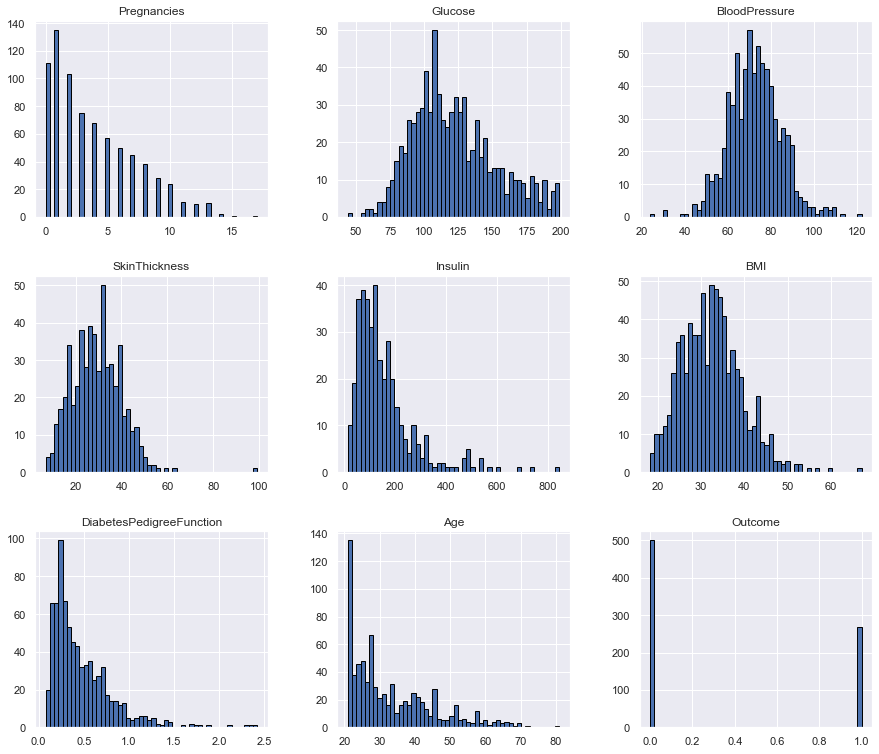

In [7]:
diabetes_data.hist(figsize=(15, 13), bins=50, edgecolor='black')
plt.show()

Some skewness in the plots here but nothing obviously amiss. Looks like there is some gooe variability in the data. 

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

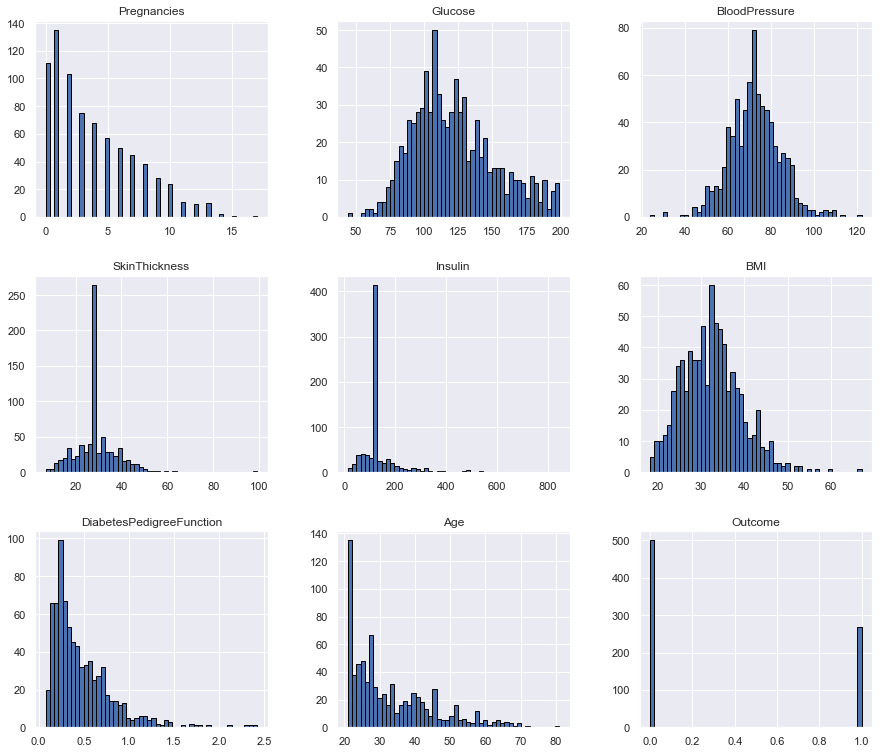

In [9]:
diabetes_data.hist(figsize=(15, 13), bins=50, edgecolor='black')
plt.show()

Imputing with the mean/ median (depending on the column) hasn't really affected some of the plots, but others are radically different. 
Skin Thickness and Insulin in partcualr are now dominated by their median values. Both these features had large numbers of missing values before imputing. 
Adding this many median values is going to bias the data for these features quite a bit. A more complext imputation scheme is called for here I think. 

#### Plot the correlation matrix heatmap

Correlation between various features


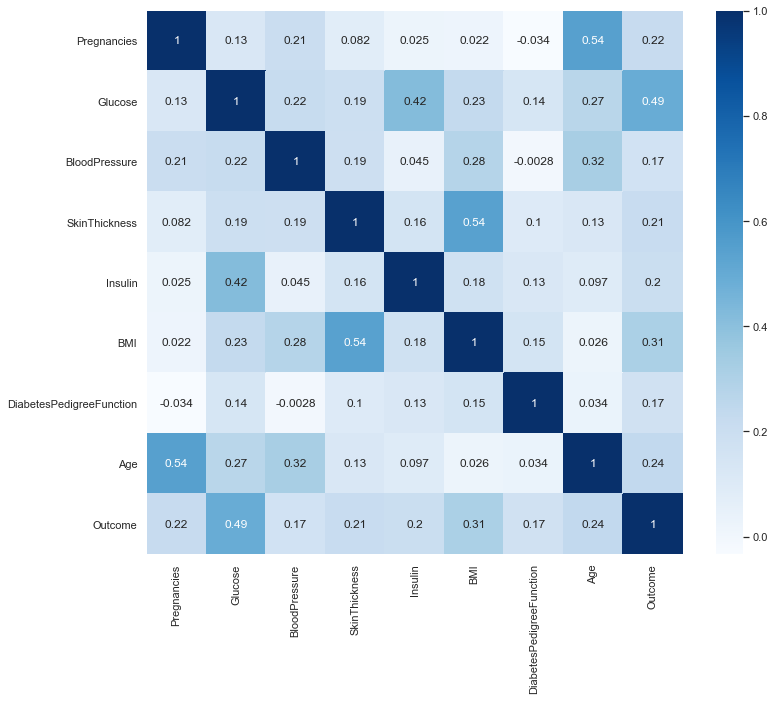

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

Not a lot of correlation here. The highest value we're seeing is barely above 0.5. Not very strong. We're seeing very few negative correlations, which is
also interesting. So all the features move together, but barely. 

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
X = diabetes_data.drop(['Outcome'], axis = 1)
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [14]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [15]:
for i in range(1,10):
    n = i
    test_score = test_scores[i-1]
    train_score = train_scores[i-1]

    print(f'For n = {n} : training accuracy = {train_score} - Testing accuracy = {test_score}')


For n = 1 : training accuracy = 1.0 - Testing accuracy = 0.683982683982684
For n = 2 : training accuracy = 0.845437616387337 - Testing accuracy = 0.7056277056277056
For n = 3 : training accuracy = 0.839851024208566 - Testing accuracy = 0.6926406926406926
For n = 4 : training accuracy = 0.8212290502793296 - Testing accuracy = 0.70995670995671
For n = 5 : training accuracy = 0.8212290502793296 - Testing accuracy = 0.670995670995671
For n = 6 : training accuracy = 0.8212290502793296 - Testing accuracy = 0.7012987012987013
For n = 7 : training accuracy = 0.8119180633147114 - Testing accuracy = 0.696969696969697
For n = 8 : training accuracy = 0.8044692737430168 - Testing accuracy = 0.696969696969697
For n = 9 : training accuracy = 0.7951582867783985 - Testing accuracy = 0.70995670995671


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [16]:
#Skip the first index where n
max_train_score = max(train_scores[:])
n = train_scores.index(max_train_score) + 1

print(f'The max accuracy score for the training dataset is {max_train_score} at n_neighbors = {n}')

The max accuracy score for the training dataset is 1.0 at n_neighbors = 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [17]:
max_test_score = max(test_scores[:])
n = test_scores.index(max_test_score) + 1

print(f'The max accuracy score for the training dataset is {max_test_score} at n_neighbors = {n}')

The max accuracy score for the training dataset is 0.70995670995671 at n_neighbors = 4


Plot the train and test model performance by number of neighbors.

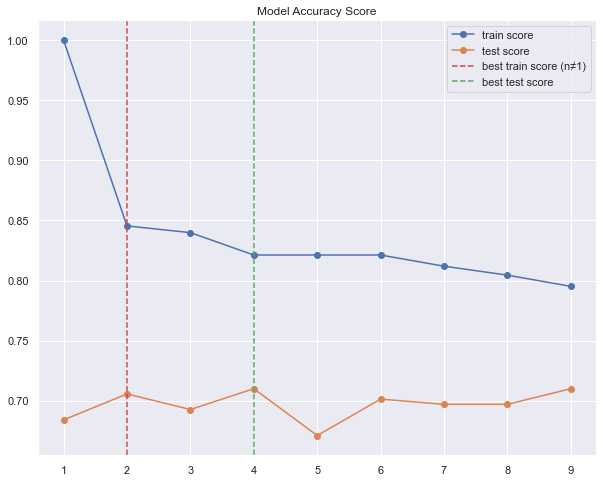

In [18]:
#We're not plotting the best test score as n = 1 here because it causes the training score to be 1 by default.

x_values = range(1, len(test_scores) + 1)

best_train = train_scores.index(max(train_scores[1:])) + 1
best_test = test_scores.index(max(test_scores)) + 1


plt.figure(figsize=(10,8))


plt.plot(x_values ,train_scores,marker = 'o', label = 'train score')
plt.plot(x_values, test_scores, marker = 'o', label = 'test score')

plt.axvline(best_train,color ='r', linestyle = '--', label = 'best train score (n≠1)')
plt.axvline(best_test,color ='g', linestyle = '--', label = 'best test score')

plt.xticks([1,2,3,4,5,6,7,8,9])

plt.title('Model Accuracy Score')
plt.legend()

plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [19]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

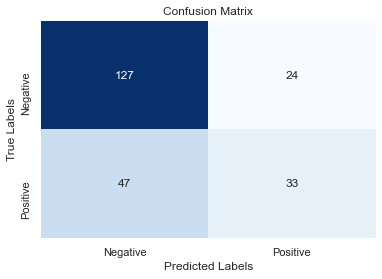

In [21]:
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])

plt.show()

**<font color='teal'> Print the classification report </font>**

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       151
           1       0.58      0.41      0.48        80

    accuracy                           0.69       231
   macro avg       0.65      0.63      0.63       231
weighted avg       0.68      0.69      0.68       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [24]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

I've run the code as written and I tried it with X being scaled for the grid search as well. I don't seem to be able to 
replicate the n_neighbors being 14. I'm getting 31. If this is an error in my code please let me know. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [25]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators':np.arange(1,50)}
rf = RandomForestClassifier()
knn_cv= GridSearchCV(rf,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7735081911552498
Best Parameters: {'n_estimators': 16}


Interesting that this model did a little better than KNN. Both models stil have a lot of hyperparatmers that could be tuned to improve performance. 
It's not clear from this notebook so far which would be a better fit for the data or which would perform better. 